## Ejercicios de pair programming 19 enero: Correlación y covarianza

1- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza indica solo la dirección de la relación (positiva o negativa), mientras que la correlación indica también el nivel de relación (fuerza), más cercano a -1 o 1 más relación y más cercano a 0, menor relación.

2 - Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [3]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0
1,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0
2,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0
3,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0
4,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0


In [4]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

### Covarianza

In [5]:
#Vemos la covarianza a trevés de .cov()
df.cov()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,30.838664,52.181512,33.993055,33.164692,38.035193,30.778033,0.460137
exposure,52.181512,104.860371,14.846090,10.591830,22.411055,11.533825,2.024576
vulnerability,33.993055,14.846090,191.425651,202.223111,193.744613,178.308102,-3.626152
susceptibility,33.164692,10.591830,202.223111,245.455825,184.044341,177.168035,-2.789894
lack_of_coping_capabilities,38.035193,22.411055,193.744613,184.044341,226.167133,171.020017,1.827360
lack_of_adaptive_capacities,30.778033,11.533825,178.308102,177.168035,171.020017,186.736433,-9.916633
year,0.460137,2.024576,-3.626152,-2.789894,1.827360,-9.916633,10.125413


In [6]:
df_limpio.cov()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,10.068616,11.960118,32.748064,35.279650,32.869743,30.094535,-0.359790
exposure,11.960118,20.713826,16.656410,17.403648,18.297817,14.267363,0.284516
vulnerability,32.748064,16.656410,198.543113,213.483231,197.644737,184.501748,-4.034438
susceptibility,35.279650,17.403648,213.483231,260.878054,191.843770,187.727878,-3.111856
lack_of_coping_capabilities,32.869743,18.297817,197.644737,191.843770,226.902794,174.187914,1.528599
lack_of_adaptive_capacities,30.094535,14.267363,184.501748,187.727878,174.187914,191.590402,-10.520538
year,-0.359790,0.284516,-4.034438,-3.111856,1.528599,-10.520538,10.072041


In [7]:
outliers.cov()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,70.698039,106.598531,50.622168,41.823116,69.525902,40.510292,3.257326
exposure,106.598531,213.025876,13.654592,9.577990,33.455892,-2.076739,8.001925
vulnerability,50.622168,13.654592,134.236528,110.498338,163.526190,128.671582,-0.138031
susceptibility,41.823116,9.577990,110.498338,116.298792,123.713353,91.472071,0.579895
lack_of_coping_capabilities,69.525902,33.455892,163.526190,123.713353,220.394942,146.446872,3.943312
lack_of_adaptive_capacities,40.510292,-2.076739,128.671582,91.472071,146.446872,148.089682,-4.939801
year,3.257326,8.001925,-0.138031,0.579895,3.943312,-4.939801,10.491266


Podemos ver que la mayoría de las relaciones son positivas, es decir, al aumentar una variable aumenta otra, salvo en el caso de los años y la vulneravilidad, susceptibilidad y lack of adaptive capacities, esto tendría sentido porque a medida que pasan los años las regiones se adaptan y mejoran las infraestructuras ante posibles desastres.

### Correlación

In [8]:
df.corr()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,1.000000,0.917621,0.442428,0.381190,0.455432,0.405582,0.026040
exposure,0.917621,1.000000,0.104787,0.066020,0.145526,0.082424,0.062133
vulnerability,0.442428,0.104787,1.000000,0.932919,0.931140,0.943097,-0.082364
susceptibility,0.381190,0.066020,0.932919,1.000000,0.781126,0.827531,-0.055962
lack_of_coping_capabilities,0.455432,0.145526,0.931140,0.781126,1.000000,0.832181,0.038186
lack_of_adaptive_capacities,0.405582,0.082424,0.943097,0.827531,0.832181,1.000000,-0.228057
year,0.026040,0.062133,-0.082364,-0.055962,0.038186,-0.228057,1.000000


In [9]:
df_limpio.corr()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,1.000000,0.828172,0.732442,0.688368,0.687688,0.685198,-0.035728
exposure,0.828172,1.000000,0.259731,0.236751,0.266900,0.226478,0.019698
vulnerability,0.732442,0.259731,1.000000,0.938032,0.931189,0.945989,-0.090219
susceptibility,0.688368,0.236751,0.938032,1.000000,0.788513,0.839698,-0.060707
lack_of_coping_capabilities,0.687688,0.266900,0.931189,0.788513,1.000000,0.835432,0.031975
lack_of_adaptive_capacities,0.685198,0.226478,0.945989,0.839698,0.835432,1.000000,-0.239493
year,-0.035728,0.019698,-0.090219,-0.060707,0.031975,-0.239493,1.000000


In [10]:
outliers.corr()

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,1.000000,0.868623,0.519639,0.461238,0.556983,0.395913,0.119603
exposure,0.868623,1.000000,0.080747,0.060851,0.154403,-0.011692,0.169264
vulnerability,0.519639,0.080747,1.000000,0.884368,0.950717,0.912609,-0.003678
susceptibility,0.461238,0.060851,0.884368,1.000000,0.772731,0.697009,0.016602
lack_of_coping_capabilities,0.556983,0.154403,0.950717,0.772731,1.000000,0.810619,0.082006
lack_of_adaptive_capacities,0.395913,-0.011692,0.912609,0.697009,0.810619,1.000000,-0.125324
year,0.119603,0.169264,-0.003678,0.016602,0.082006,-0.125324,1.000000


Comentamos los resultados después del heatmap ya que nos parece más sencillo

3 - Con los resultados de la correlación del ejercicio anterior, cread un heatmap

### Heatmap

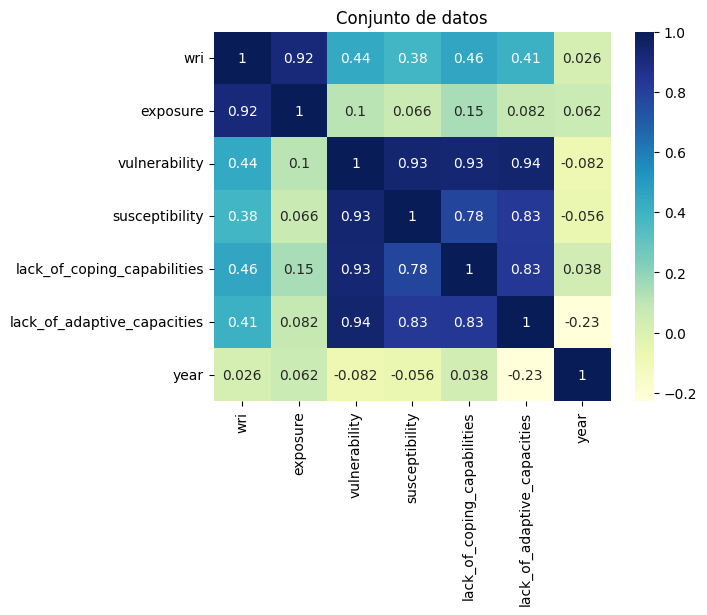

In [11]:
sns.heatmap(df.corr(), 
            cmap = "YlGnBu",
           annot = True)
           
plt.title('Conjunto de datos');

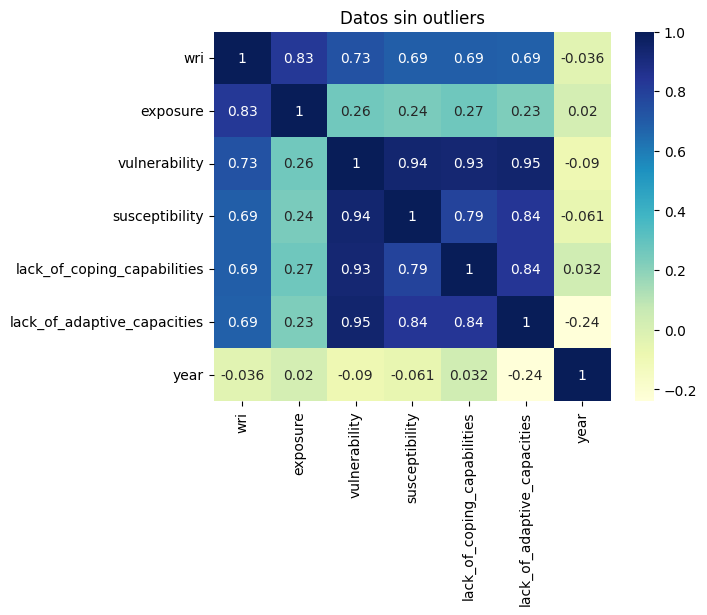

In [12]:
sns.heatmap(df_limpio.corr(), 
            cmap = "YlGnBu",
           annot = True)
           
plt.title('Datos sin outliers');

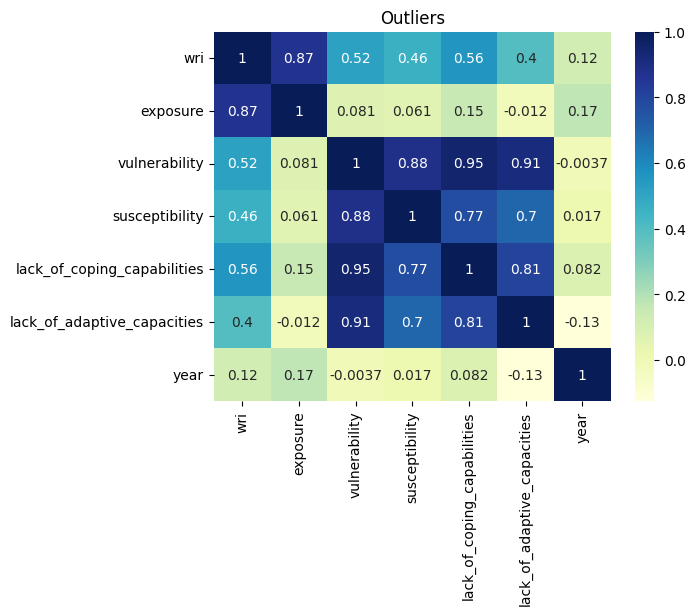

In [13]:
sns.heatmap(outliers.corr(), 
            cmap = "YlGnBu",
           annot = True)
           
plt.title('Outliers');

En el cálculo de las correlaciones y el heatmap podemos ver que hay una alta correlación positiva entre la vulnerabilidad y el lack of capacities y capabilities, es decir una región es más vulnerable si tiene menos capacidad de aviso ante un desastre y de reacción ante este. 

También hay una alta correlacion entre vulnerabilidad y susceptibilidad, tiene sentido también que si una región es más vulnerable es más susceptible de tener un desastre.

También hay una correlación significativa entre wri y el exposure, tiene sentido que si es una región con un alto WRI (World Risk Score), tenga más exposición a desastres naturales como terremotos, huracanes, inundaciones, sequías y aumento del nivel del mar. 

Al analizar los datos sin outliers podemos ver que la correlación entre WRI y el resto de las variables aumenta significativamente, podemos entender que es porque los outliers representan desastres en regiones donde no suelen ocurrir y no están preparadas para ello. 

4 - Guardad la gráfica del heatmap.

Guardamos la imagen manualmente